In [1]:
from pathlib import Path ; from shutil import copytree  ; from tempfile import TemporaryDirectory ; import pandas as pd
import numpy as np ;  import flopy ;  import os ; import pathlib ; import numpy as np; import matplotlib.pyplot as plt# import git 

In [2]:
example_name = "rmg"                  # sim_name
exe_name = 'E:\\15_REPOS\\00_BETAMI\\bin\\mf6'
current_directory = os.getcwd();  print(current_directory)

E:\15_REPOS\00_BETAMI\98_Plus\02_MT3D


In [3]:
path = pathlib.Path('E:\\15_REPOS\\00_BETAMI\\98_Plus\\02_MT3D')
path.mkdir(parents=True, exist_ok=True); os.chdir(path); current_directory = os.getcwd()
directory_name = 'B_p03_V02'    ; workspace = os.path.join('.', directory_name)                         # sim_ws
if os.path.isdir(workspace) is False:
    os.mkdir(workspace) 
output_folder = Path('B_p03_V02') ; output_folder.mkdir(exist_ok=True)        

In [4]:
data_path_R = 'E:\\15_REPOS\\00_BETAMI\\98_Plus\\02_MT3D\\B_p03_V01\\ex-gwt-mt3dms-p03'
sim = flopy.mf6.MFSimulation.load(sim_ws = data_path_R   ,exe_name=exe_name,  verbosity_level=0)

In [5]:
sim.set_sim_path(output_folder) ; sim.write_simulation(silent=True) ; sim.run_simulation(silent=True)

(True, [])

## **Outputs**

In [6]:
ml = sim.get_model("gwf-p03-mf6")
hds = ml.output.head()               ; H = hds.get_data() 
bud = ml.output.budget()             ; Q = bud.get_data(idx=0, full3D=True) 

In [7]:
mt = sim.get_model("gwt_p03-mf6")
print("OC package_Transp: ", mt.oc.output.methods())

OC package_Transp:  ['list()', 'zonebudget()', 'budget()', 'budgetcsv()', 'concentration()']


In [8]:
bud = ml.oc.output.concentration()   ; C = bud.get_data(idx=0)           ; print(H.shape), type(Q), print(C.shape)

(1, 31, 46)
(1, 31, 46)


(None, list, None)

In [9]:
reshape = H.reshape(H.shape[1],-1) ; then=pd.DataFrame(reshape)  ; then.to_csv (output_folder / "_H.csv") ;  # print(reshape.shape)
reshape = C.reshape(H.shape[1],-1) ; then=pd.DataFrame(reshape)  ; then.to_csv (output_folder / "_C.csv") ;  # print(reshape.shape)

In [10]:
# parameters and variables 
length_units = "meters"
time_units = "days"
nlay = 1  # Number of layers
nrow = 31  # Number of rows
ncol = 46  # Number of columns
delr = 10.0  # Column width ($m$)
delc = 10.0  # Row width ($m$)
delz = 10.0  # Layer thickness ($m$)
top = 0.0  # Top of the model ($m$)
prsity = 0.3  # Porosity
perlen = 365  # Simulation time ($days$)
k11 = 1.0  # Horizontal hydraulic conductivity ($m/d$)
qwell = 1.0  # Volumetric injection rate ($m^3/d$)
cwell = 1000.0  # Concentration of injected water ($mg/L$)
al = 10.0  # Longitudinal dispersivity ($m$)
trpt = 0.3  # Ratio of transverse to longitudinal dispersivity
perlen = [1, 365.0]
nper = len(perlen)
nstp = [2, 730]
tsmult = [1.0, 1.0]
sconc = 0.0
dt0 = 0.3
ath1 = al * trpt
dmcoef = 0.0
botm = [top - delz]  # Model geometry
k33 = k11  # Vertical hydraulic conductivity ($m/d$)
icelltype = 0
Lx = (ncol - 1) * delr
v = 1.0 / 3.0
prsity = 0.3
q = v * prsity
h1 = q * Lx
strt = np.zeros((nlay, nrow, ncol), dtype=float)
strt[0, :, 0] = h1

nouter, ninner = 100, 300
hclose, rclose, relax = 1e-6, 1e-6, 1.0
ttsmult = 1.0
percel = 1.0    # HMOC parameters in case they are invoked
itrack = 3      # HMOC
wd = 0.5        # HMOC

dceps = 1.0e-5  # HMOC
nplane = 1      # HMOC
npl = 0         # HMOC
nph = 16        # HMOC
npmin = 4       # HMOC
npmax = 32       # HMOC
dchmoc = 1.0e-3  # HMOC
nlsink = nplane  # HMOC
npsink = nph     # HMOC

tdis_rc = []

In [11]:
def plot_2d (map_data      ,delr, delc     , colorbar_label  , cmap):        
    r, c   = np.shape   (map_data);                 
    x_coord = np.linspace(0, delr*c, c+1)  ; y_coord = np.linspace(0, delc*r, r+1);          X,Y = np.meshgrid(x_coord, y_coord)
    plt.figure(figsize=(3, 1), dpi=200)    ; plt.pcolormesh(X, Y, map_data, cmap=cmap,shading = 'auto', edgecolor ='k', linewidth = 0.01)
    plt.gca().set_aspect('equal')          ; cbar = plt.colorbar()  ; cbar.set_label(colorbar_label)  ; plt.show()
ibound = np.ones ((nlay, nrow, ncol), dtype=int) ; ibound[0,:,-10:-5]=-1;   

In [12]:
# plot_2d    (ibound[0,:,:]  ,delr, delc     , 'ibound'        , 'magma' )          # ; print(ibound.shape); 

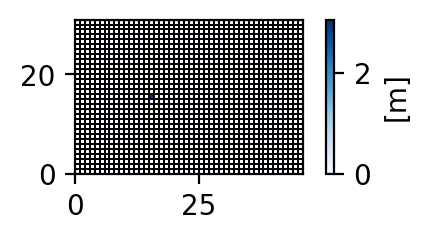

In [13]:
plot_2d(C[0,:,:], 1, 1,      '[m]', 'Blues')    # H  # ... a  option

In [14]:
print(C.shape)     # no #           plot_2d(C[1,:,:], 1, 1,      '[m]', 'Blues')

(1, 31, 46)
